### Importação dos dados



In [27]:
!pip install matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import statistics

urls = {
  "loja1": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
  "loja2": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
  "loja3": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
  "loja4": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv",
}

df_lojas = pd.concat([
    pd.read_csv(url).assign(Loja=nome) for nome, url in urls.items()
], ignore_index=True)

print(df_lojas)

                    Produto   Categoria do Produto    Preço      Frete  \
0        Assistente virtual            eletronicos   219.08   9.249790   
1            Mesa de jantar                 moveis   256.35  11.234305   
2         Jogo de tabuleiro             brinquedos   279.51  21.262681   
3               Micro-ondas       eletrodomesticos  1009.99  54.667344   
4     Cadeira de escritório                 moveis   446.99  26.964689   
...                     ...                    ...      ...        ...   
9430         Mesa de jantar                 moveis   303.60  16.852799   
9431  Cadeira de escritório                 moveis   456.02  24.812798   
9432           Copo térmico        esporte e lazer    48.99   3.139675   
9433        Jogo de panelas  utilidades domesticas   202.45  11.062979   
9434         Corda de pular        esporte e lazer    14.89   1.732696   

     Data da Compra        Vendedor Local da compra  Avaliação da compra  \
0        16/01/2021     Pedro Gomes

#1. Análise do faturamento


In [10]:
faturamento_por_loja = df_lojas.groupby("Loja")["Preço"].sum().reset_index(name="Faturamento")
print(faturamento_por_loja)

    Loja  Faturamento
0  loja1   1534509.12
1  loja2   1488459.06
2  loja3   1464025.03
3  loja4   1384497.58


# 2. Vendas por Categoria


In [11]:
vendas_por_categoria = df_lojas.groupby(["Loja", "Categoria do Produto"]).size().reset_index(name="Quantidade")
print(vendas_por_categoria)

     Loja   Categoria do Produto  Quantidade
0   loja1             brinquedos         324
1   loja1       eletrodomesticos         312
2   loja1            eletronicos         448
3   loja1        esporte e lazer         284
4   loja1  instrumentos musicais         182
5   loja1                 livros         173
6   loja1                 moveis         465
7   loja1  utilidades domesticas         171
8   loja2             brinquedos         313
9   loja2       eletrodomesticos         305
10  loja2            eletronicos         422
11  loja2        esporte e lazer         275
12  loja2  instrumentos musicais         224
13  loja2                 livros         197
14  loja2                 moveis         442
15  loja2  utilidades domesticas         181
16  loja3             brinquedos         315
17  loja3       eletrodomesticos         278
18  loja3            eletronicos         451
19  loja3        esporte e lazer         277
20  loja3  instrumentos musicais         177
21  loja3 

# 3. Média de Avaliação das Lojas

In [12]:
media_avalicoes = df_lojas.groupby("Loja")["Avaliação da compra"].mean().reset_index(name="Avaliações")
print(media_avalicoes)

    Loja  Avaliações
0  loja1    3.976685
1  loja2    4.037304
2  loja3    4.048326
3  loja4    3.995759


# 4. Produtos Mais e Menos Vendidos

In [16]:
produto_mais_menos_vendidos = df_lojas.groupby(["Loja", "Produto"]).size().reset_index(name="Vendas")
print(produto_mais_menos_vendidos)

      Loja             Produto  Vendas
0    loja1  Assistente virtual      40
1    loja1             Bateria      53
2    loja1           Bicicleta      54
3    loja1    Blocos de montar      56
4    loja1    Bola de basquete      55
..     ...                 ...     ...
199  loja4       Sofá retrátil      47
200  loja4       TV Led UHD 4K      40
201  loja4         Tablet ABXY      45
202  loja4              Violão      37
203  loja4   Xadrez de madeira      39

[204 rows x 3 columns]


# 5. Frete Médio por Loja


In [17]:
frete_medio_por_loja = df_lojas.groupby("Loja")["Frete"].mean().reset_index(name="Custo")
print(frete_medio_por_loja)

    Loja      Custo
0  loja1  34.691805
1  loja2  33.621941
2  loja3  33.074464
3  loja4  31.278997


# Gráficos

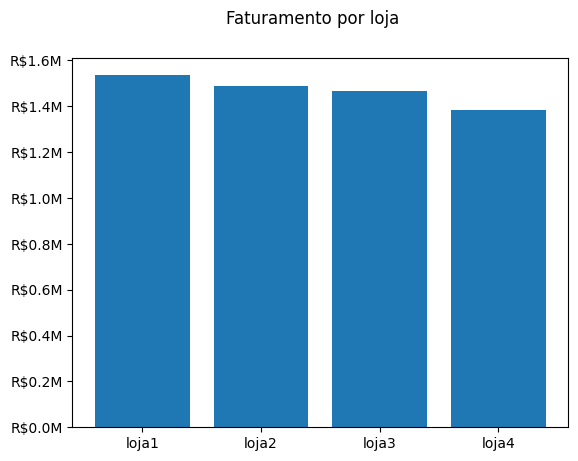

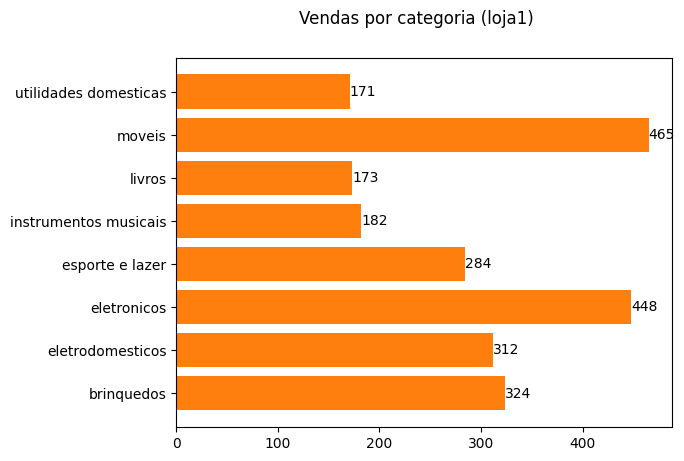

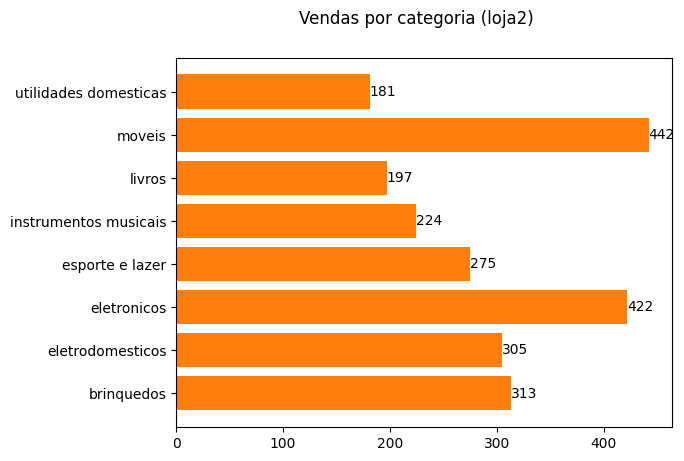

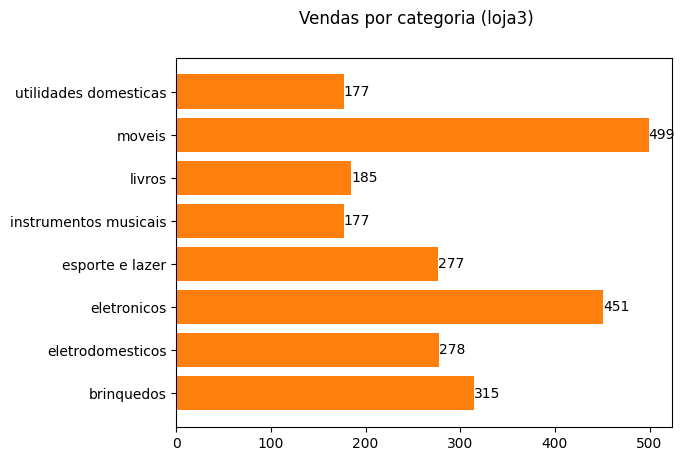

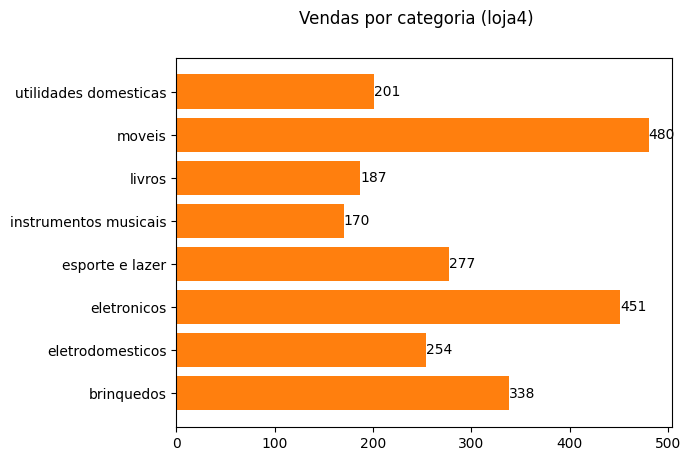

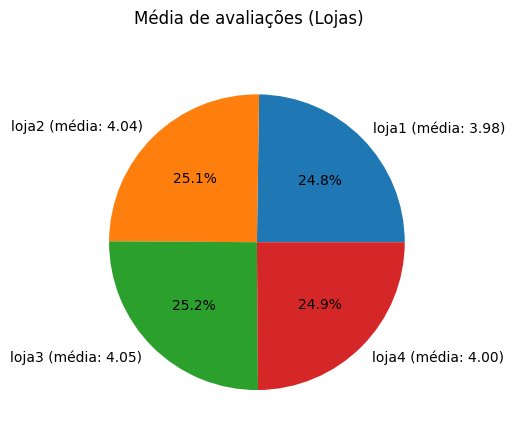

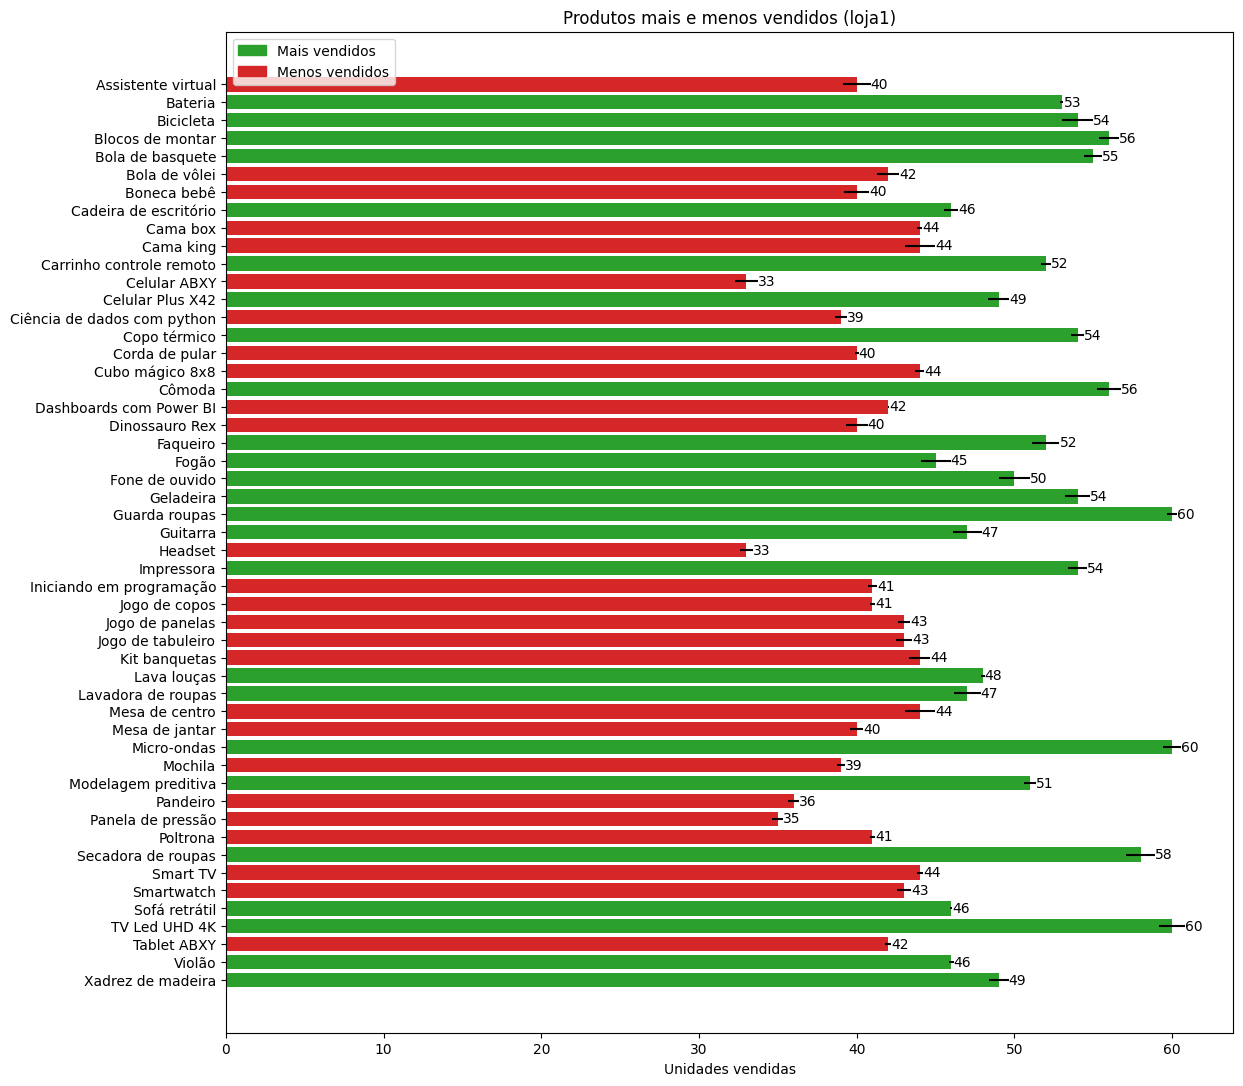

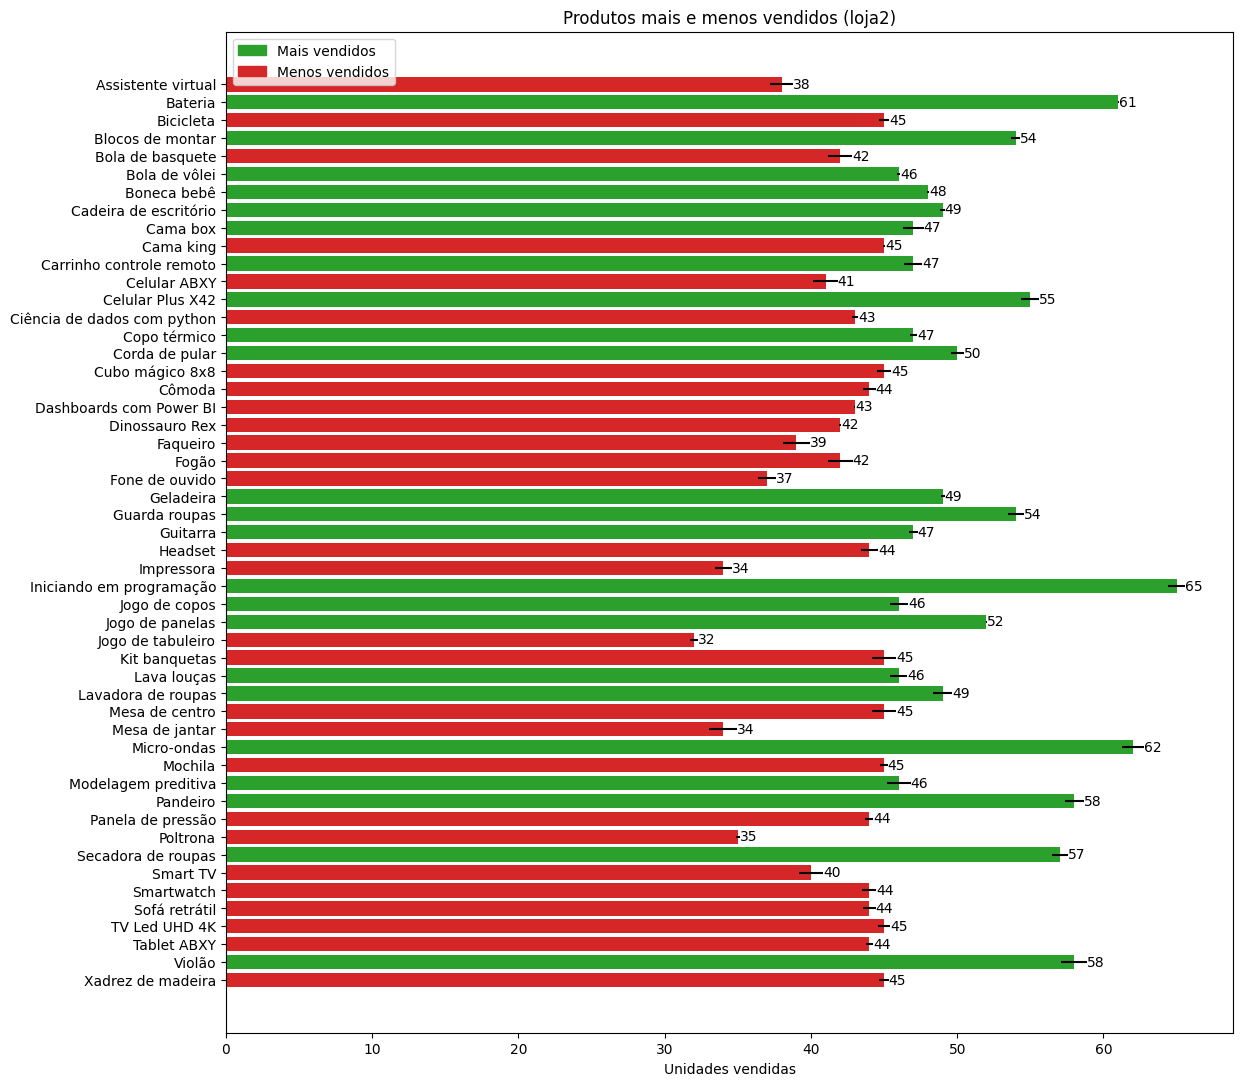

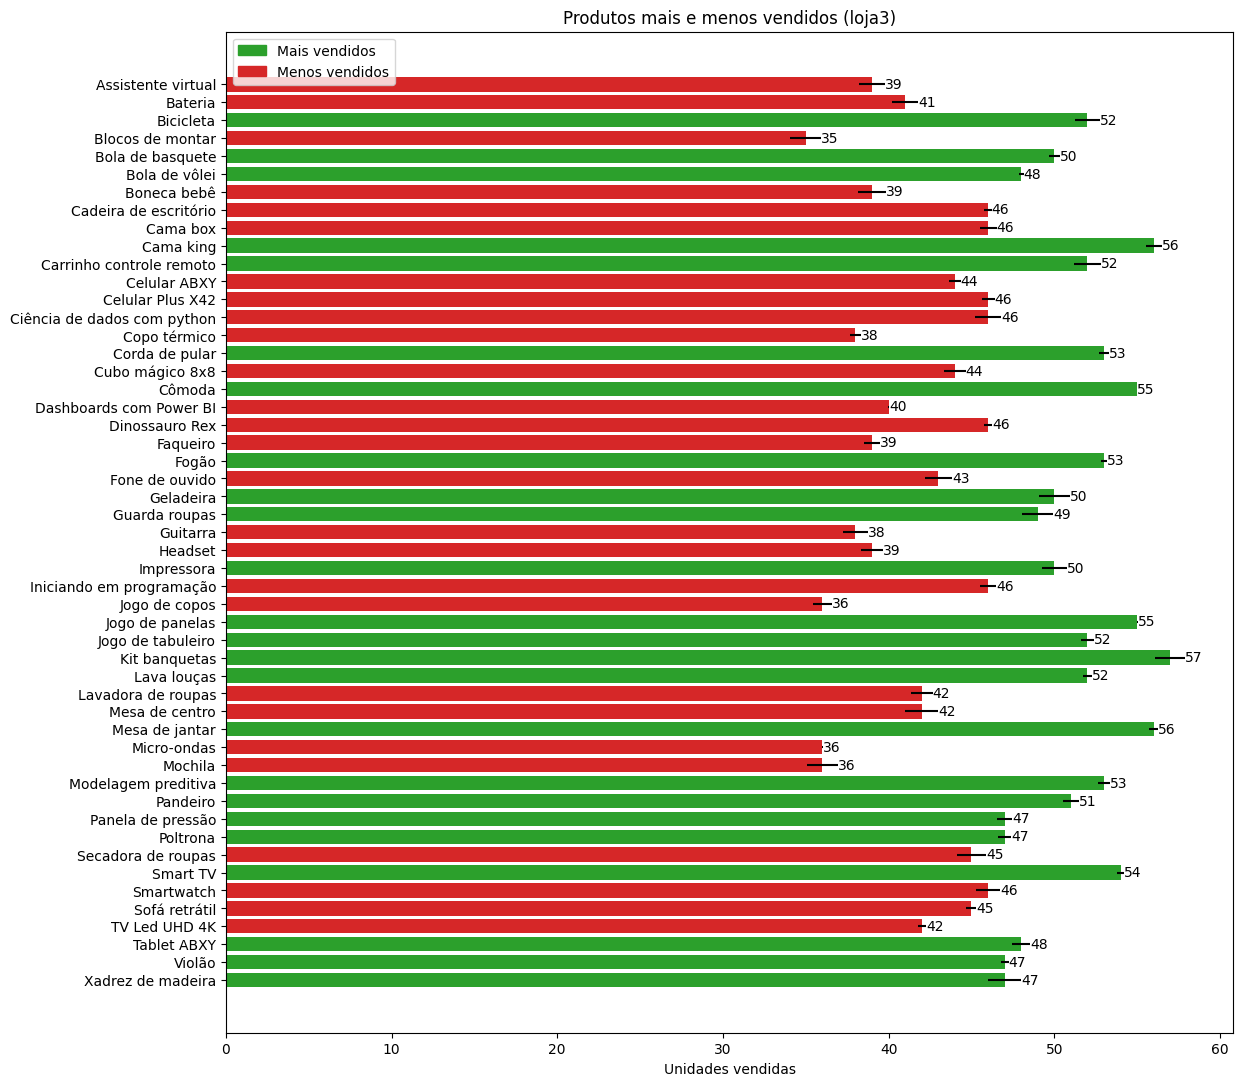

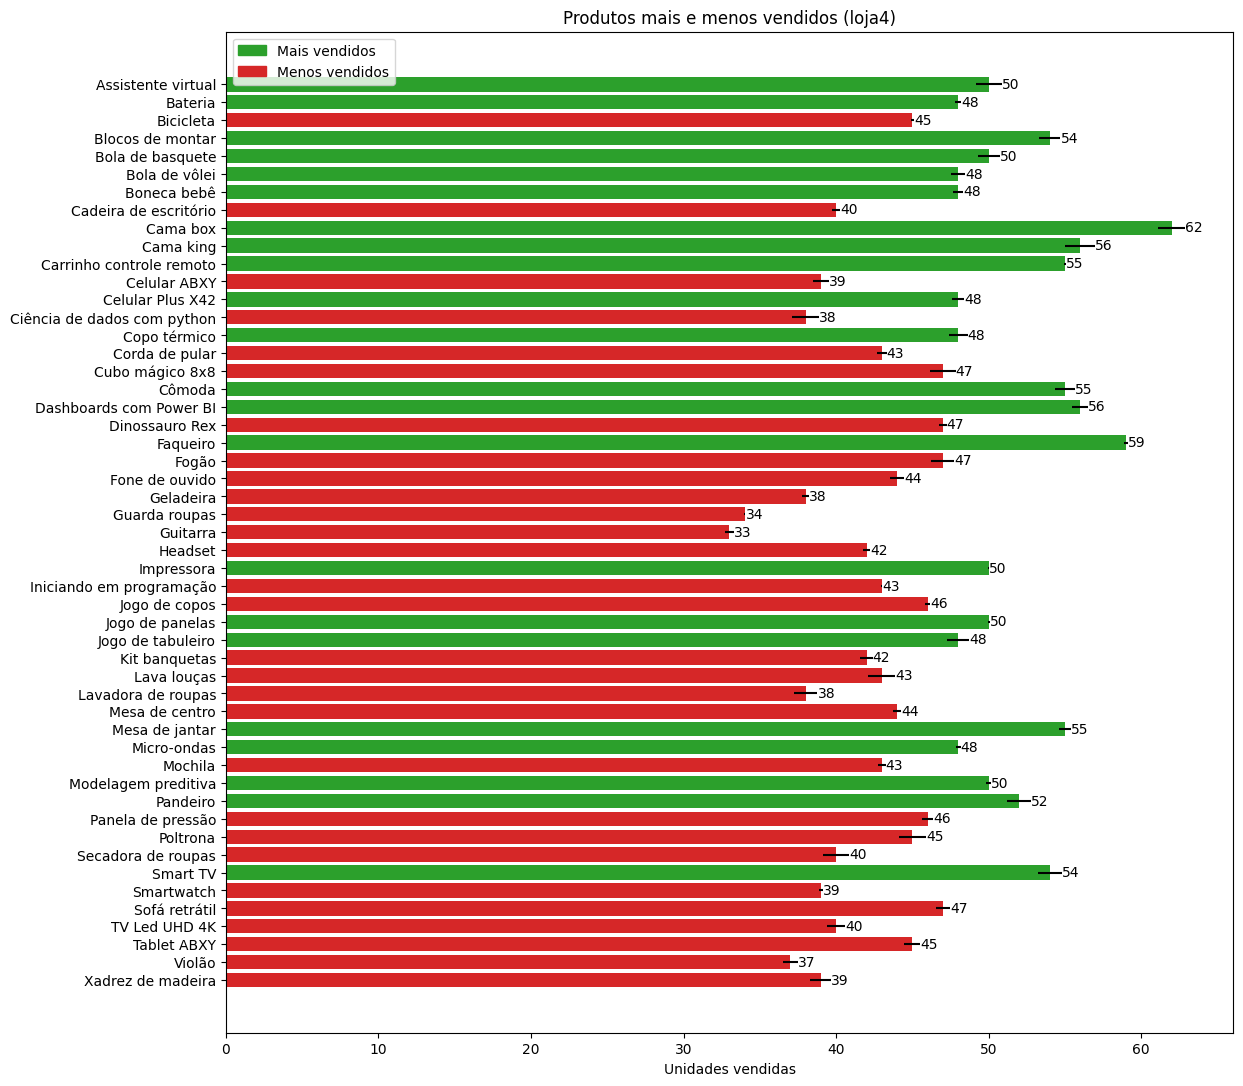

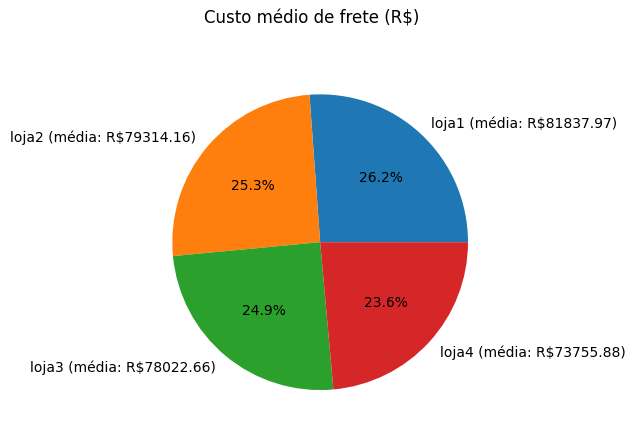

In [28]:
# Faturamento por loja
def millions(x, pos):
    return f'R${x*1e-6:1.1f}M'


fig, ax = plt.subplots()

ax.yaxis.set_major_formatter(millions)
ax.bar([loja for loja, money in faturamento_por_loja.values], [money for loja, money in faturamento_por_loja.values])
plt.suptitle('Faturamento por loja')

plt.show()

# Vendas por categoria
for loja, grupo in vendas_por_categoria.groupby("Loja"):
  fig, ax = plt.subplots()
  plt.suptitle(f'Vendas por categoria ({loja})')
  y_pos = np.arange(len(grupo['Quantidade']))
  hbars = ax.barh(y_pos, grupo['Quantidade'], align='center')
  ax.barh(grupo['Categoria do Produto'], grupo['Quantidade'])
  ax.bar_label(hbars)
  plt.show()

# Média Avaliações Lojas
labels = media_avalicoes['Loja']
sizes = media_avalicoes['Avaliações']

fig, ax = plt.subplots()
ax.pie(media_avalicoes['Avaliações'], labels=[f"{loja} (média: {valor:.2f})" for loja, valor in media_avalicoes.values], autopct='%1.1f%%')
plt.suptitle('Média de avaliações (Lojas)')
plt.show()

# Produtos mais e menos vendidos
for lojas, grupo in produto_mais_menos_vendidos.groupby("Loja"):
  product_names = grupo['Produto']
  product_values = grupo['Vendas']

  y_pos = np.arange(len(product_names))
  error = np.random.rand(len(product_names))

  fig, ax = plt.subplots(figsize=(13, 13))

  mediana = statistics.median(product_values)
  bar_colors = ["tab:green" if mediana < valor else "tab:red" for valor in product_values]
  hbars = ax.barh(y_pos, product_values, xerr=error, align='center', color=bar_colors)
  ax.set_yticks(y_pos, labels=product_names)
  ax.invert_yaxis()
  ax.set_xlabel('Unidades vendidas')
  ax.set_title(f'Produtos mais e menos vendidos ({lojas})')
  ax.bar_label(hbars)

  green_patch = mpatches.Patch(color='tab:green', label='Mais vendidos')
  red_patch = mpatches.Patch(color='tab:red', label='Menos vendidos')

  ax.legend(handles=[green_patch, red_patch], loc='upper left')

  plt.show()


  labels = frete_medio_por_loja['Loja']

# Frete médio por loja
sizes = frete_medio_por_loja['Custo']

fig, ax = plt.subplots()
ax.pie(sizes, labels=[f"{loja} (média: R${valor:.2f})" for loja, valor in frete_medio_por_loja.values], autopct='%1.1f%%')
plt.suptitle('Custo médio de frete (R$)')
plt.show()

# Relatório

> A loja 1 tem o maior custo de frete, a menor avaliação mas tem o maior faturamento.

> A loja 2 tem o segundo maior custo de frete, a segunda maior avaliação e tem o sugundo maior faturamento

> A loja 3 tem o segundo menor custo de frete, a melhor avaliação mas tem o segundo pior faturamento

> A loja 4 tem o menor custo de frete, a segunda menor avaliação mas tem o menor faturamento

Não foram levados em consideração as vendas por categorias e nem os produto que foram mais ou menos vendidos, já que todos os produtos de todas as categorias tanto os mais ou menos vendidos foram somados ao faturamento de cada loja.

Conclusão: João deve vender a loja que tem o menor faturamento (loja 4) pois mesmo tendo o menor custo de frete, não faz com que o seu faturamento seja melhor, levando em consideracão que o faturamento é o valor de maior peso.